In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset into a Pandas DataFrame
df = pd.read_csv("house-prices.csv")

# Step 2: Data Cleaning
# Handle missing values, outliers, and duplicates based on your specific dataset.
# For example, to remove duplicates we use drop_duplicates
df = df.drop_duplicates()

# Step 3: Encode categorical variables using one-hot encoding or label encoding
# In this we use one-hot encoding for the 'Brick' and 'Neighborhood' columns.
df = pd.get_dummies(df, columns=['Brick', 'Neighborhood'], drop_first=True)

# Step 4: Handle numerical features, such as scaling or transformation
# We here standardize numerical columns using StandardScaler.
# sklearn library offers us with StandardScaler() function to standardize the data values into a standard format
scaler = StandardScaler()
numerical_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
# fit_transform method is used to fit the transformation parameters on the training data and transform the input data using the learned parameters.
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 5: Split the dataset into training and testing sets
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test ready for further analysis.


First 5 rows of the dataset:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East

Summary statistics of numerical columns:
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000  

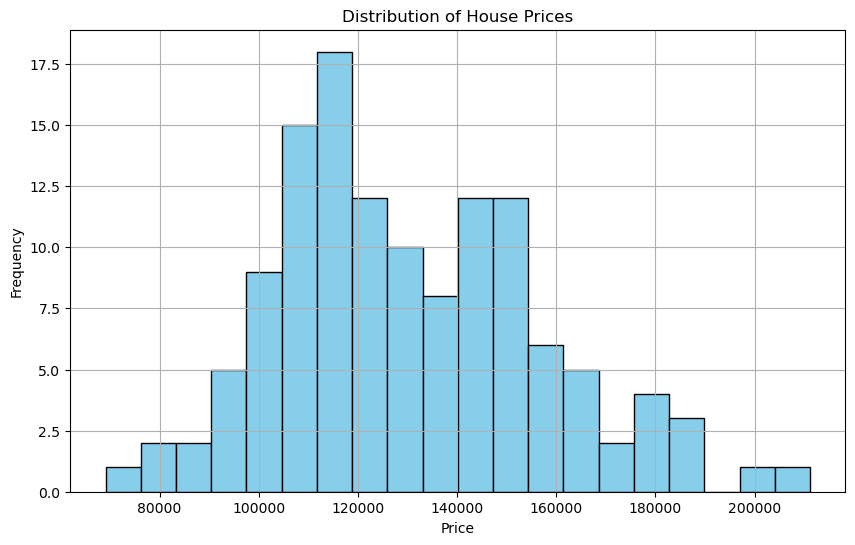

C:\Users\amans\AppData\Local\Temp\ipykernel_3404\2827132849.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


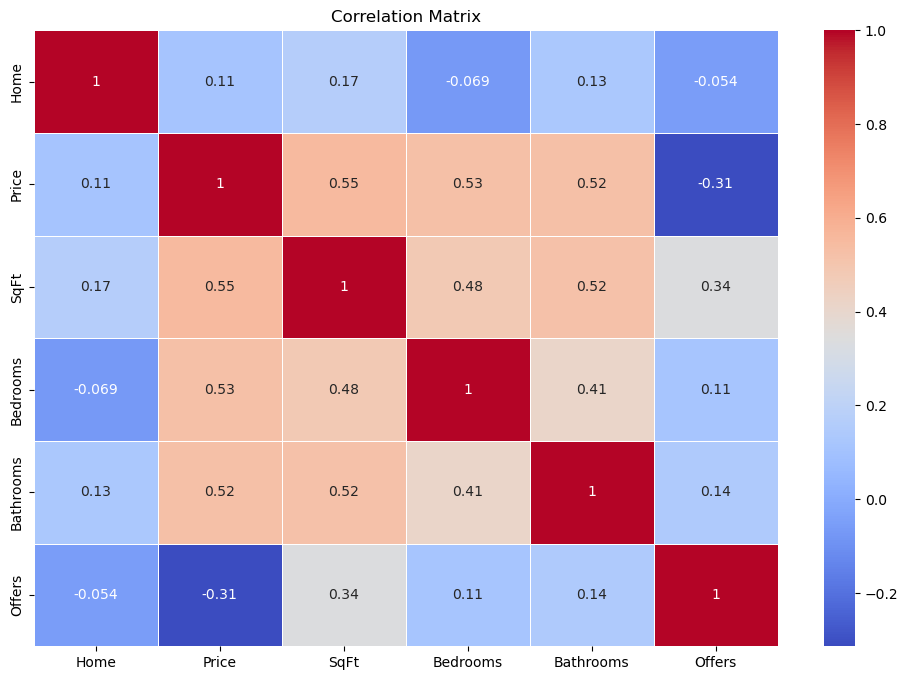

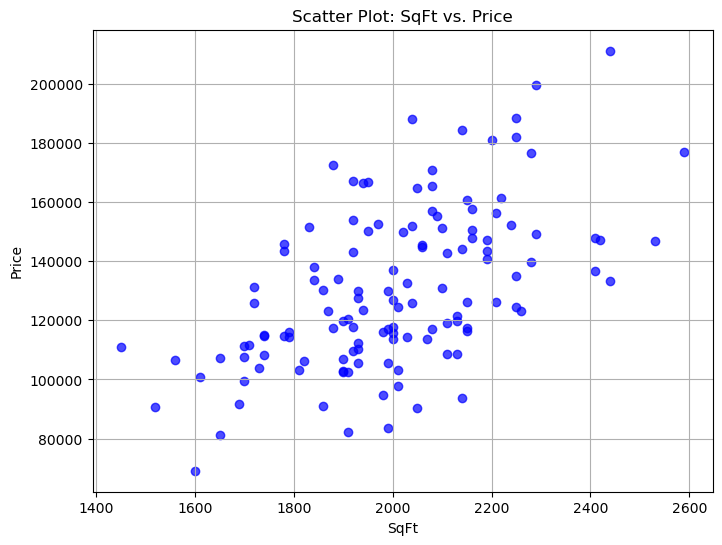

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1. Explore the dataset's structure and statistics using appropriate Pandas functions
df = pd.read_csv("house-prices.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Get summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Get information about data types and missing values
print("\nData types and missing values:")
print(df.info())

# Step 2. Visualize the distribution of house prices using a histogram
# - 'df['Price']': Specifies the data to be plotted, which is the 'Price' column from the DataFrame.
# - 'bins=20': Divides the range of prices into 20 bins or intervals.
# - 'color='skyblue'' and 'edgecolor='black'': Set the color of the bars and their edges.
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3. Investigate the relationships between features and house prices using scatter plots or correlation matrices
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a figure with a specific size (width: 12 units, height: 8 units)
plt.figure(figsize=(12, 8))
# Create a heatmap of the correlation matrix
# - 'correlation_matrix': The data to be visualized, which is the correlation matrix calculated from the dataset.
# - 'annot=True': Annotate the cells of the heatmap with the correlation values.
# - 'cmap='coolwarm'': Set the color map for the heatmap to 'coolwarm'.
# - 'linewidths=0.5': Add white lines between the cells for better readability.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# You can also explore individual scatter plots for specific features of interest.
# For example, let's visualize the relationship between square footage (SqFt) and house prices (Price).
plt.figure(figsize=(8, 6))
plt.scatter(df['SqFt'], df['Price'], alpha=0.7, color='blue')
plt.title('Scatter Plot: SqFt vs. Price')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [13]:
#4.
# Identify the features with the highest positive and negative correlations with Price
# Calculate the correlations between 'Price' and all other features and sort them in descending order
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
# Print the top positive correlations with 'Price'
print("\nTop positive correlations with Price:")
print(price_correlations.head(5))  # Top positive correlations

# Print the top negative correlations with 'Price'
print("\nTop negative correlations with Price:")
print(price_correlations.tail(5))  # Top negative correlations




Top positive correlations with Price:
Price        1.000000
SqFt         0.552982
Bedrooms     0.525926
Bathrooms    0.523258
Home         0.108190
Name: Price, dtype: float64

Top negative correlations with Price:
SqFt         0.552982
Bedrooms     0.525926
Bathrooms    0.523258
Home         0.108190
Offers      -0.313636
Name: Price, dtype: float64


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("house-prices.csv")

# Encode categorical variables (if needed)
df = pd.get_dummies(df, columns=['Brick', 'Neighborhood'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression models
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train and evaluate each model
models = [linear_regression_model, decision_tree_model, random_forest_model]
model_names = ["Linear Regression", "Decision Tree", "Random Forest"]

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print evaluation results
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("-" * 50)

#Results for each model, including MAE, RMSE, and R-squared.


Model: Linear Regression
Mean Absolute Error (MAE): 8858.89
Root Mean Squared Error (RMSE): 10688.83
R-squared (R2): 0.81
--------------------------------------------------
Model: Decision Tree
Mean Absolute Error (MAE): 16473.08
Root Mean Squared Error (RMSE): 20921.38
R-squared (R2): 0.26
--------------------------------------------------
Model: Random Forest
Mean Absolute Error (MAE): 10076.69
Root Mean Squared Error (RMSE): 13685.61
R-squared (R2): 0.68
--------------------------------------------------


In [17]:
# Initialize the Random Forest model
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the tuning
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions using the tuned model
y_pred = best_rf_model.predict(X_test)

# Evaluate the tuned model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Best Hyperparameters: {best_params}")

Tuned Random Forest Model Evaluation:
Root Mean Squared Error (RMSE): 13619.56
R-squared (R2): 0.69
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}


In [6]:
best_model = None
best_r2_score = -1  # Initialize with a low value

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"R-squared (R2): {r2:.2f}")
    print("-" * 50)

    # Check if this model has the highest R-squared so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model_name

# Select the best-performing model based on R-squared
print(f"Best-Performing Model: {best_model} with R-squared (R2): {best_r2_score:.2f}")

Model: Linear Regression
R-squared (R2): 0.81
--------------------------------------------------
Model: Decision Tree
R-squared (R2): 0.26
--------------------------------------------------
Model: Random Forest
R-squared (R2): 0.68
--------------------------------------------------
Best-Performing Model: Linear Regression with R-squared (R2): 0.81


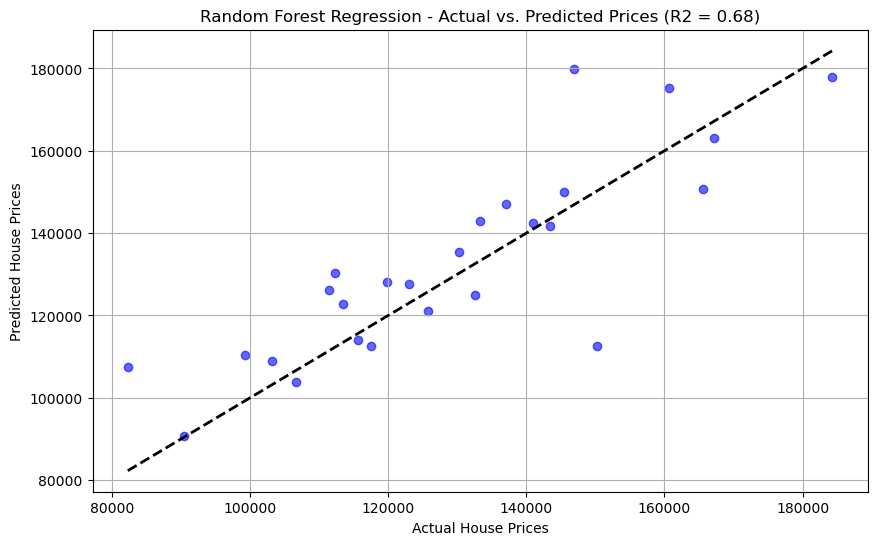

In [7]:
# Visualize the predictions vs. actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='b', alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title(f"Random Forest Regression - Actual vs. Predicted Prices (R2 = {r2:.2f})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.grid(True)
plt.show()


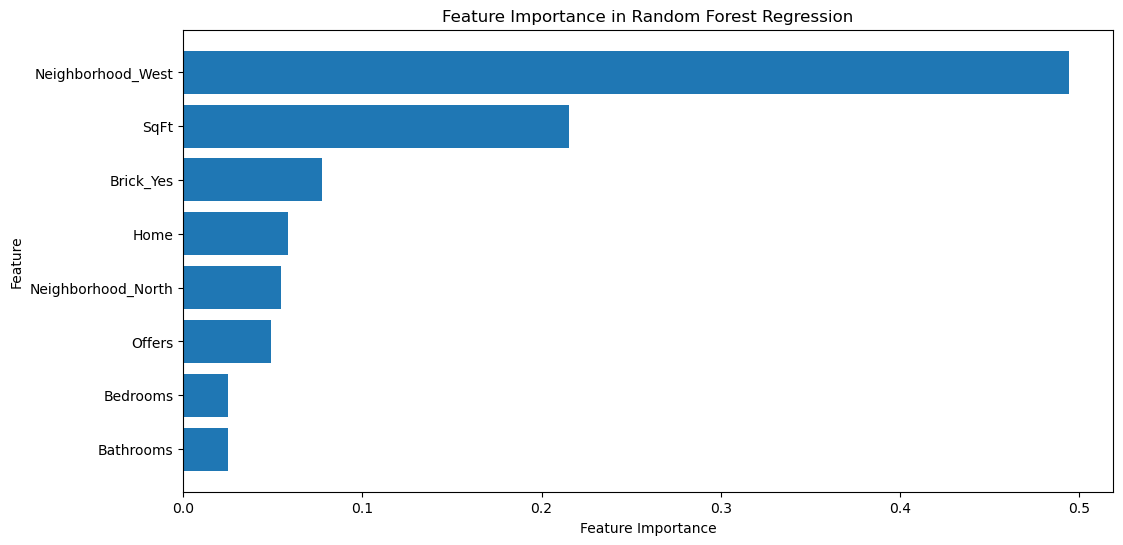

Top 10 Most Important Features:
              Feature  Importance
7   Neighborhood_West    0.494094
1                SqFt    0.215313
5           Brick_Yes    0.077756
0                Home    0.058451
6  Neighborhood_North    0.054847
4              Offers    0.049090
2            Bedrooms    0.025336
3           Bathrooms    0.025113


In [8]:
# Get feature importances from the trained model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

# You can also print the top N most important features if needed
top_n = 10
top_features = feature_importance_df.head(top_n)
print(f"Top {top_n} Most Important Features:")
print(top_features)